# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.1, 0.001]
EPOCHS = 50
BATCH_SIZE = 256

In [7]:
from keras.optimizers import SGD, RMSprop, Adam, Adagrad

OPTIMIZERS = [SGD, RMSprop, Adam, Adagrad]
optimizer_name =['SGD','RMSprop','Adam','Adagrad']

In [18]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
#for index,optimizers in enumerate(OPTIMIZERS):
#    for lr in LEARNING_RATE:
import itertools
for lr, opt in itertools.product(LEARNING_RATE, OPTIMIZERS):
    keras.backend.clear_session()
    tag = str(opt)
    tag2 = tag.split('.',3)[2]
    print('Opitimizer is {} and Learning rate is {}'.format(tag2.split('\'',2)[0], str(lr)))
    model= build_mlp(input_shape= x_train.shape[1:])
    model.summary()
        
    optimizer=optimizers(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
        
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size= BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
        
    # Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
        
    name_tag = 'Opitimizer:{} & Learning rate:{}'.format(tag2.split('\'',2)[0], str(lr))
    results[name_tag] = {'train-loss': train_loss, 'valid-loss':valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}

Opitimizer is SGD and Learning rate is 0.1
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000

50000/50000 [==============================] - 9s 174us/step - loss: 0.7712 - accuracy: 0.7255 - val_loss: 1.6519 - val_accuracy: 0.4959
Epoch 49/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.7687 - accuracy: 0.7256 - val_loss: 2.2447 - val_accuracy: 0.4228
Epoch 50/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.7556 - accuracy: 0.7299 - val_loss: 1.7265 - val_accuracy: 0.4947
Opitimizer is RMSprop and Learning rate is 0.1
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________

50000/50000 [==============================] - 8s 154us/step - loss: 0.8446 - accuracy: 0.6994 - val_loss: 1.5795 - val_accuracy: 0.4952
Epoch 46/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.8045 - accuracy: 0.7147 - val_loss: 1.8141 - val_accuracy: 0.4465
Epoch 47/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.8019 - accuracy: 0.7122 - val_loss: 1.6478 - val_accuracy: 0.4927
Epoch 48/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.7795 - accuracy: 0.7243 - val_loss: 1.7276 - val_accuracy: 0.4901
Epoch 49/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.7716 - accuracy: 0.7267 - val_loss: 1.5248 - val_accuracy: 0.5328
Epoch 50/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.7513 - accuracy: 0.7313 - val_loss: 1.6486 - val_accuracy: 0.5051
Opitimizer is Adam and Learning rate is 0.1
Model: "model_1"
_________________________________________________________

50000/50000 [==============================] - 7s 149us/step - loss: 0.8694 - accuracy: 0.6913 - val_loss: 1.7858 - val_accuracy: 0.4488
Epoch 43/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.8549 - accuracy: 0.6980 - val_loss: 1.5568 - val_accuracy: 0.4974
Epoch 44/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.8382 - accuracy: 0.7018 - val_loss: 1.5986 - val_accuracy: 0.4833
Epoch 45/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.8233 - accuracy: 0.7091 - val_loss: 1.8409 - val_accuracy: 0.4451
Epoch 46/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.8123 - accuracy: 0.7113 - val_loss: 1.6155 - val_accuracy: 0.4818
Epoch 47/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.7908 - accuracy: 0.7207 - val_loss: 1.8414 - val_accuracy: 0.4675
Epoch 48/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.7764 - accuracy: 0.7253 - val_loss:

50000/50000 [==============================] - 8s 152us/step - loss: 0.9252 - accuracy: 0.6690 - val_loss: 1.6508 - val_accuracy: 0.4624
Epoch 40/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.9084 - accuracy: 0.6775 - val_loss: 1.5900 - val_accuracy: 0.4870
Epoch 41/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.8923 - accuracy: 0.6819 - val_loss: 1.6869 - val_accuracy: 0.4693
Epoch 42/50
50000/50000 [==============================] - 7s 146us/step - loss: 0.8682 - accuracy: 0.6919 - val_loss: 1.6781 - val_accuracy: 0.4636
Epoch 43/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.8558 - accuracy: 0.6949 - val_loss: 1.5338 - val_accuracy: 0.5140
Epoch 44/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.8403 - accuracy: 0.7003 - val_loss: 1.6470 - val_accuracy: 0.4886
Epoch 45/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8231 - accuracy: 0.7057 - val_loss:

50000/50000 [==============================] - 7s 149us/step - loss: 1.7490 - accuracy: 0.3959 - val_loss: 1.7516 - val_accuracy: 0.3916
Epoch 37/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7441 - accuracy: 0.3971 - val_loss: 1.7476 - val_accuracy: 0.3937
Epoch 38/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7396 - accuracy: 0.3976 - val_loss: 1.7405 - val_accuracy: 0.3961
Epoch 39/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7350 - accuracy: 0.4000 - val_loss: 1.7400 - val_accuracy: 0.3940
Epoch 40/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.7307 - accuracy: 0.4015 - val_loss: 1.7335 - val_accuracy: 0.3955
Epoch 41/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.7263 - accuracy: 0.4032 - val_loss: 1.7299 - val_accuracy: 0.4013
Epoch 42/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7221 - accuracy: 0.4056 - val_loss:

50000/50000 [==============================] - 7s 149us/step - loss: 1.7506 - accuracy: 0.3875 - val_loss: 1.7500 - val_accuracy: 0.3900
Epoch 34/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7462 - accuracy: 0.3899 - val_loss: 1.7496 - val_accuracy: 0.3919
Epoch 35/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7418 - accuracy: 0.3912 - val_loss: 1.7421 - val_accuracy: 0.3926
Epoch 36/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.7375 - accuracy: 0.3921 - val_loss: 1.7376 - val_accuracy: 0.3938
Epoch 37/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7333 - accuracy: 0.3933 - val_loss: 1.7329 - val_accuracy: 0.3963
Epoch 38/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.7290 - accuracy: 0.3949 - val_loss: 1.7310 - val_accuracy: 0.3940
Epoch 39/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7250 - accuracy: 0.3969 - val_loss:

50000/50000 [==============================] - 7s 149us/step - loss: 1.7441 - accuracy: 0.3899 - val_loss: 1.7454 - val_accuracy: 0.3901
Epoch 31/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.7390 - accuracy: 0.3925 - val_loss: 1.7412 - val_accuracy: 0.3900
Epoch 32/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.7345 - accuracy: 0.3940 - val_loss: 1.7367 - val_accuracy: 0.3905
Epoch 33/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7300 - accuracy: 0.3953 - val_loss: 1.7350 - val_accuracy: 0.3892
Epoch 34/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7257 - accuracy: 0.3967 - val_loss: 1.7275 - val_accuracy: 0.3933
Epoch 35/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.7214 - accuracy: 0.3982 - val_loss: 1.7248 - val_accuracy: 0.3931
Epoch 36/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7169 - accuracy: 0.3994 - val_loss:

50000/50000 [==============================] - 8s 150us/step - loss: 1.7730 - accuracy: 0.3826 - val_loss: 1.7742 - val_accuracy: 0.3797
Epoch 28/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7673 - accuracy: 0.3844 - val_loss: 1.7683 - val_accuracy: 0.3843
Epoch 29/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.7617 - accuracy: 0.3878 - val_loss: 1.7636 - val_accuracy: 0.3864
Epoch 30/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7565 - accuracy: 0.3888 - val_loss: 1.7585 - val_accuracy: 0.3887
Epoch 31/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7514 - accuracy: 0.3906 - val_loss: 1.7535 - val_accuracy: 0.3857
Epoch 32/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7461 - accuracy: 0.3915 - val_loss: 1.7473 - val_accuracy: 0.3908
Epoch 33/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.7415 - accuracy: 0.3945 - val_loss:

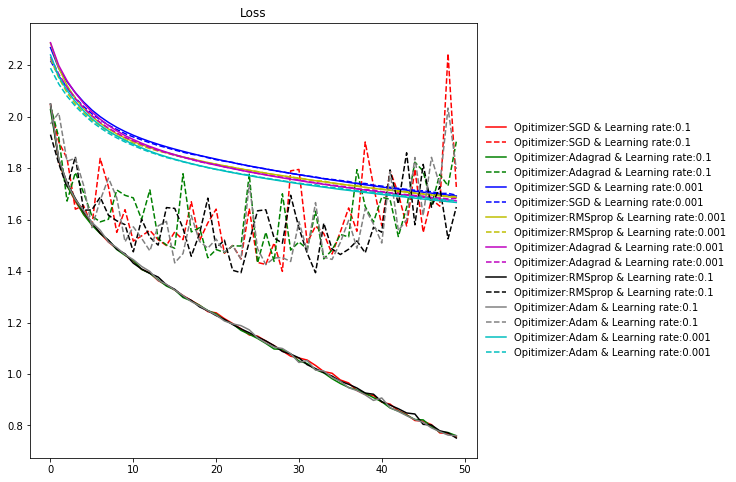

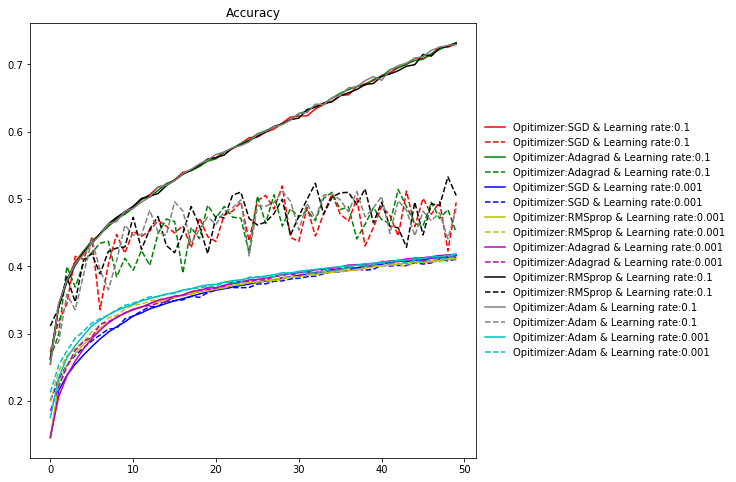

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ['r','g','b','y','m','k','gray','c']

plt.figure(figsize=(8,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

plt.figure(figsize=(8,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()